<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/hotel_bookings.csv"
df = pd.read_csv(filename)

1.Analisis y Depuracion de Datos

In [2]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           39997 non-null  object 
 1   is_canceled                     39997 non-null  int64  
 2   lead_time                       39997 non-null  int64  
 3   arrival_date_year               39997 non-null  int64  
 4   arrival_date_month              39997 non-null  object 
 5   arrival_date_week_number        39997 non-null  int64  
 6   arrival_date_day_of_month       39997 non-null  int64  
 7   stays_in_weekend_nights         39997 non-null  int64  
 8   stays_in_week_nights            39997 non-null  int64  
 9   adults                          39997 non-null  int64  
 10  children                        39997 non-null  int64  
 11  babies                          39997 non-null  int64  
 12  meal                            

In [3]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("hotelbookings.xlsx", index=False)

In [4]:
#A continuacion analizamos la correlacion entra las variables cuantitativas.

import pandas as pd

corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.230336,0.044877,0.022148,-0.007950,0.079929,0.079889,0.080742,0.081340,-0.023375,-0.103808,0.114133,-0.076934,-0.114994,0.038269,0.001418,-0.036381,0.110191,-0.244220,-0.101060
lead_time,0.230336,1.000000,0.058253,0.121115,-0.025716,0.324963,0.386793,0.136642,0.000601,0.001366,-0.150017,0.094126,-0.108286,0.074941,-0.066806,0.000389,0.089407,0.030180,-0.151122,-0.008276
arrival_date_year,0.044877,0.058253,1.000000,-0.538954,0.002190,0.017488,0.011061,-0.021942,0.057870,-0.016245,0.072836,-0.103898,0.059485,0.036037,0.128270,0.170325,-0.038189,0.126621,-0.010991,0.063318
arrival_date_week_number,0.022148,0.121115,-0.538954,1.000000,0.075236,0.047031,0.044256,0.052614,0.016358,0.017563,-0.078137,0.043272,-0.051408,0.010596,-0.043629,-0.048691,0.062513,0.156597,0.007813,0.044967
arrival_date_day_of_month,-0.007950,-0.025716,0.002190,0.075236,1.000000,-0.046080,-0.054814,-0.002366,0.017216,-0.000966,0.002704,-0.043668,0.005096,0.004622,0.026586,0.058644,0.033179,0.038993,0.014104,0.010885
stays_in_weekend_nights,0.079929,0.324963,0.017488,0.047031,-0.046080,1.000000,0.716254,0.100864,0.039448,0.015289,-0.119378,-0.006224,-0.097658,0.057419,-0.096735,0.074489,-0.008364,0.102648,-0.090883,0.061763
stays_in_week_nights,0.079889,0.386793,0.011061,0.044256,-0.054814,0.716254,1.000000,0.096862,0.033774,0.014690,-0.130225,-0.006063,-0.090736,0.086113,-0.088883,0.068036,0.029718,0.118691,-0.102718,0.057680
adults,0.080742,0.136642,-0.021942,0.052614,-0.002366,0.100864,0.096862,1.000000,0.073278,0.023198,-0.125083,0.006359,-0.133022,-0.010815,-0.014133,0.215436,-0.011540,0.202408,0.013385,0.079004
children,0.081340,0.000601,0.057870,0.016358,0.017216,0.039448,0.033774,0.073278,1.000000,0.020433,-0.043252,-0.020100,-0.036446,0.044513,0.056028,0.050798,-0.020537,0.356085,0.046383,0.028434
babies,-0.023375,0.001366,-0.016245,0.017563,-0.000966,0.015289,0.014690,0.023198,0.020433,1.000000,-0.021148,-0.008602,-0.016897,0.098225,-0.006365,0.045126,-0.007524,0.053562,0.035306,0.130811


In [5]:
# En base a ciertas premisas y con el objeto de mantener cierta integridad en la informacion, eliminaremos las siguientes columnas y filas, respectivamente:
#Company --> Igual caso que agent, es una columna que posee mucha informacion en blanco y no permite identicarla correctamente.
#Adicionalmente limpiaremos todos los datos con elementos nulos

df2=df
df2 = df2.drop(columns=['company'])
df2 = df2.dropna(subset=["children"])
df2 = df2.dropna(subset=["country"])
df2 = df2.dropna(subset=["agent"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31651 entries, 3 to 39996
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           31651 non-null  object 
 1   is_canceled                     31651 non-null  int64  
 2   lead_time                       31651 non-null  int64  
 3   arrival_date_year               31651 non-null  int64  
 4   arrival_date_month              31651 non-null  object 
 5   arrival_date_week_number        31651 non-null  int64  
 6   arrival_date_day_of_month       31651 non-null  int64  
 7   stays_in_weekend_nights         31651 non-null  int64  
 8   stays_in_week_nights            31651 non-null  int64  
 9   adults                          31651 non-null  int64  
 10  children                        31651 non-null  int64  
 11  babies                          31651 non-null  int64  
 12  meal                            

In [6]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000,31651.000000
mean,0.305962,100.209504,2016.129980,27.346087,15.653344,1.324666,3.383685,1.917033,0.147136,0.014818,0.022969,0.086316,0.049193,0.257464,217.717987,0.527377,100.009264,0.125367,0.691447
std,0.460821,94.855079,0.722976,13.473373,8.881866,1.152533,2.495282,0.499419,0.475623,0.122642,0.149808,1.260359,0.546146,0.696435,88.128078,7.618069,62.187084,0.333043,0.825323
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,20.000000,2016.000000,17.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,54.560000,0.000000,0.000000
50%,0.000000,72.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,80.810000,0.000000,0.000000
75%,1.000000,164.000000,2017.000000,37.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,242.000000,0.000000,133.055000,0.000000,1.000000
max,1.000000,542.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,26.000000,10.000000,2.000000,1.000000,26.000000,25.000000,17.000000,535.000000,154.000000,450.000000,3.000000,5.000000


1.Creacion y Optimizacion de Modelo Predictivo (KNN)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

Preparamos el dataset

In [8]:
# Las variables objeto de prediccion fueron elegidas en funcion de su correlacion con la variable a predecir.
X = df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y = df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [9]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.79


Resultados obtenidos

In [10]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5689  936]
 [1073 1798]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6625
           1       0.66      0.63      0.64      2871

    accuracy                           0.79      9496
   macro avg       0.75      0.74      0.75      9496
weighted avg       0.79      0.79      0.79      9496



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


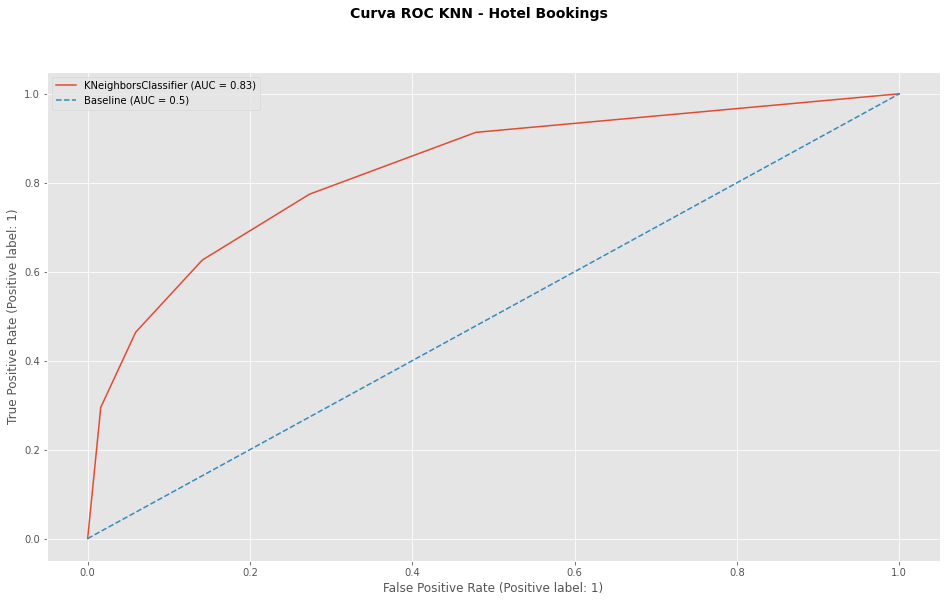

In [11]:
# Visualizar la curva ROC
plot_roc_curve(knn, X_test, y_test)
plt.suptitle("Curva ROC KNN - Hotel Bookings", fontsize=14, fontweight="bold", )
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Arbol de Decision

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

[[0.72727273 0.27272727]
 [0.5462963  0.4537037 ]
 [0.5        0.5       ]
 ...
 [0.37442922 0.62557078]
 [0.18493151 0.81506849]
 [0.5462963  0.4537037 ]]
Esta instancia pertenece a la clase [0 0 0 ... 1 1 0]


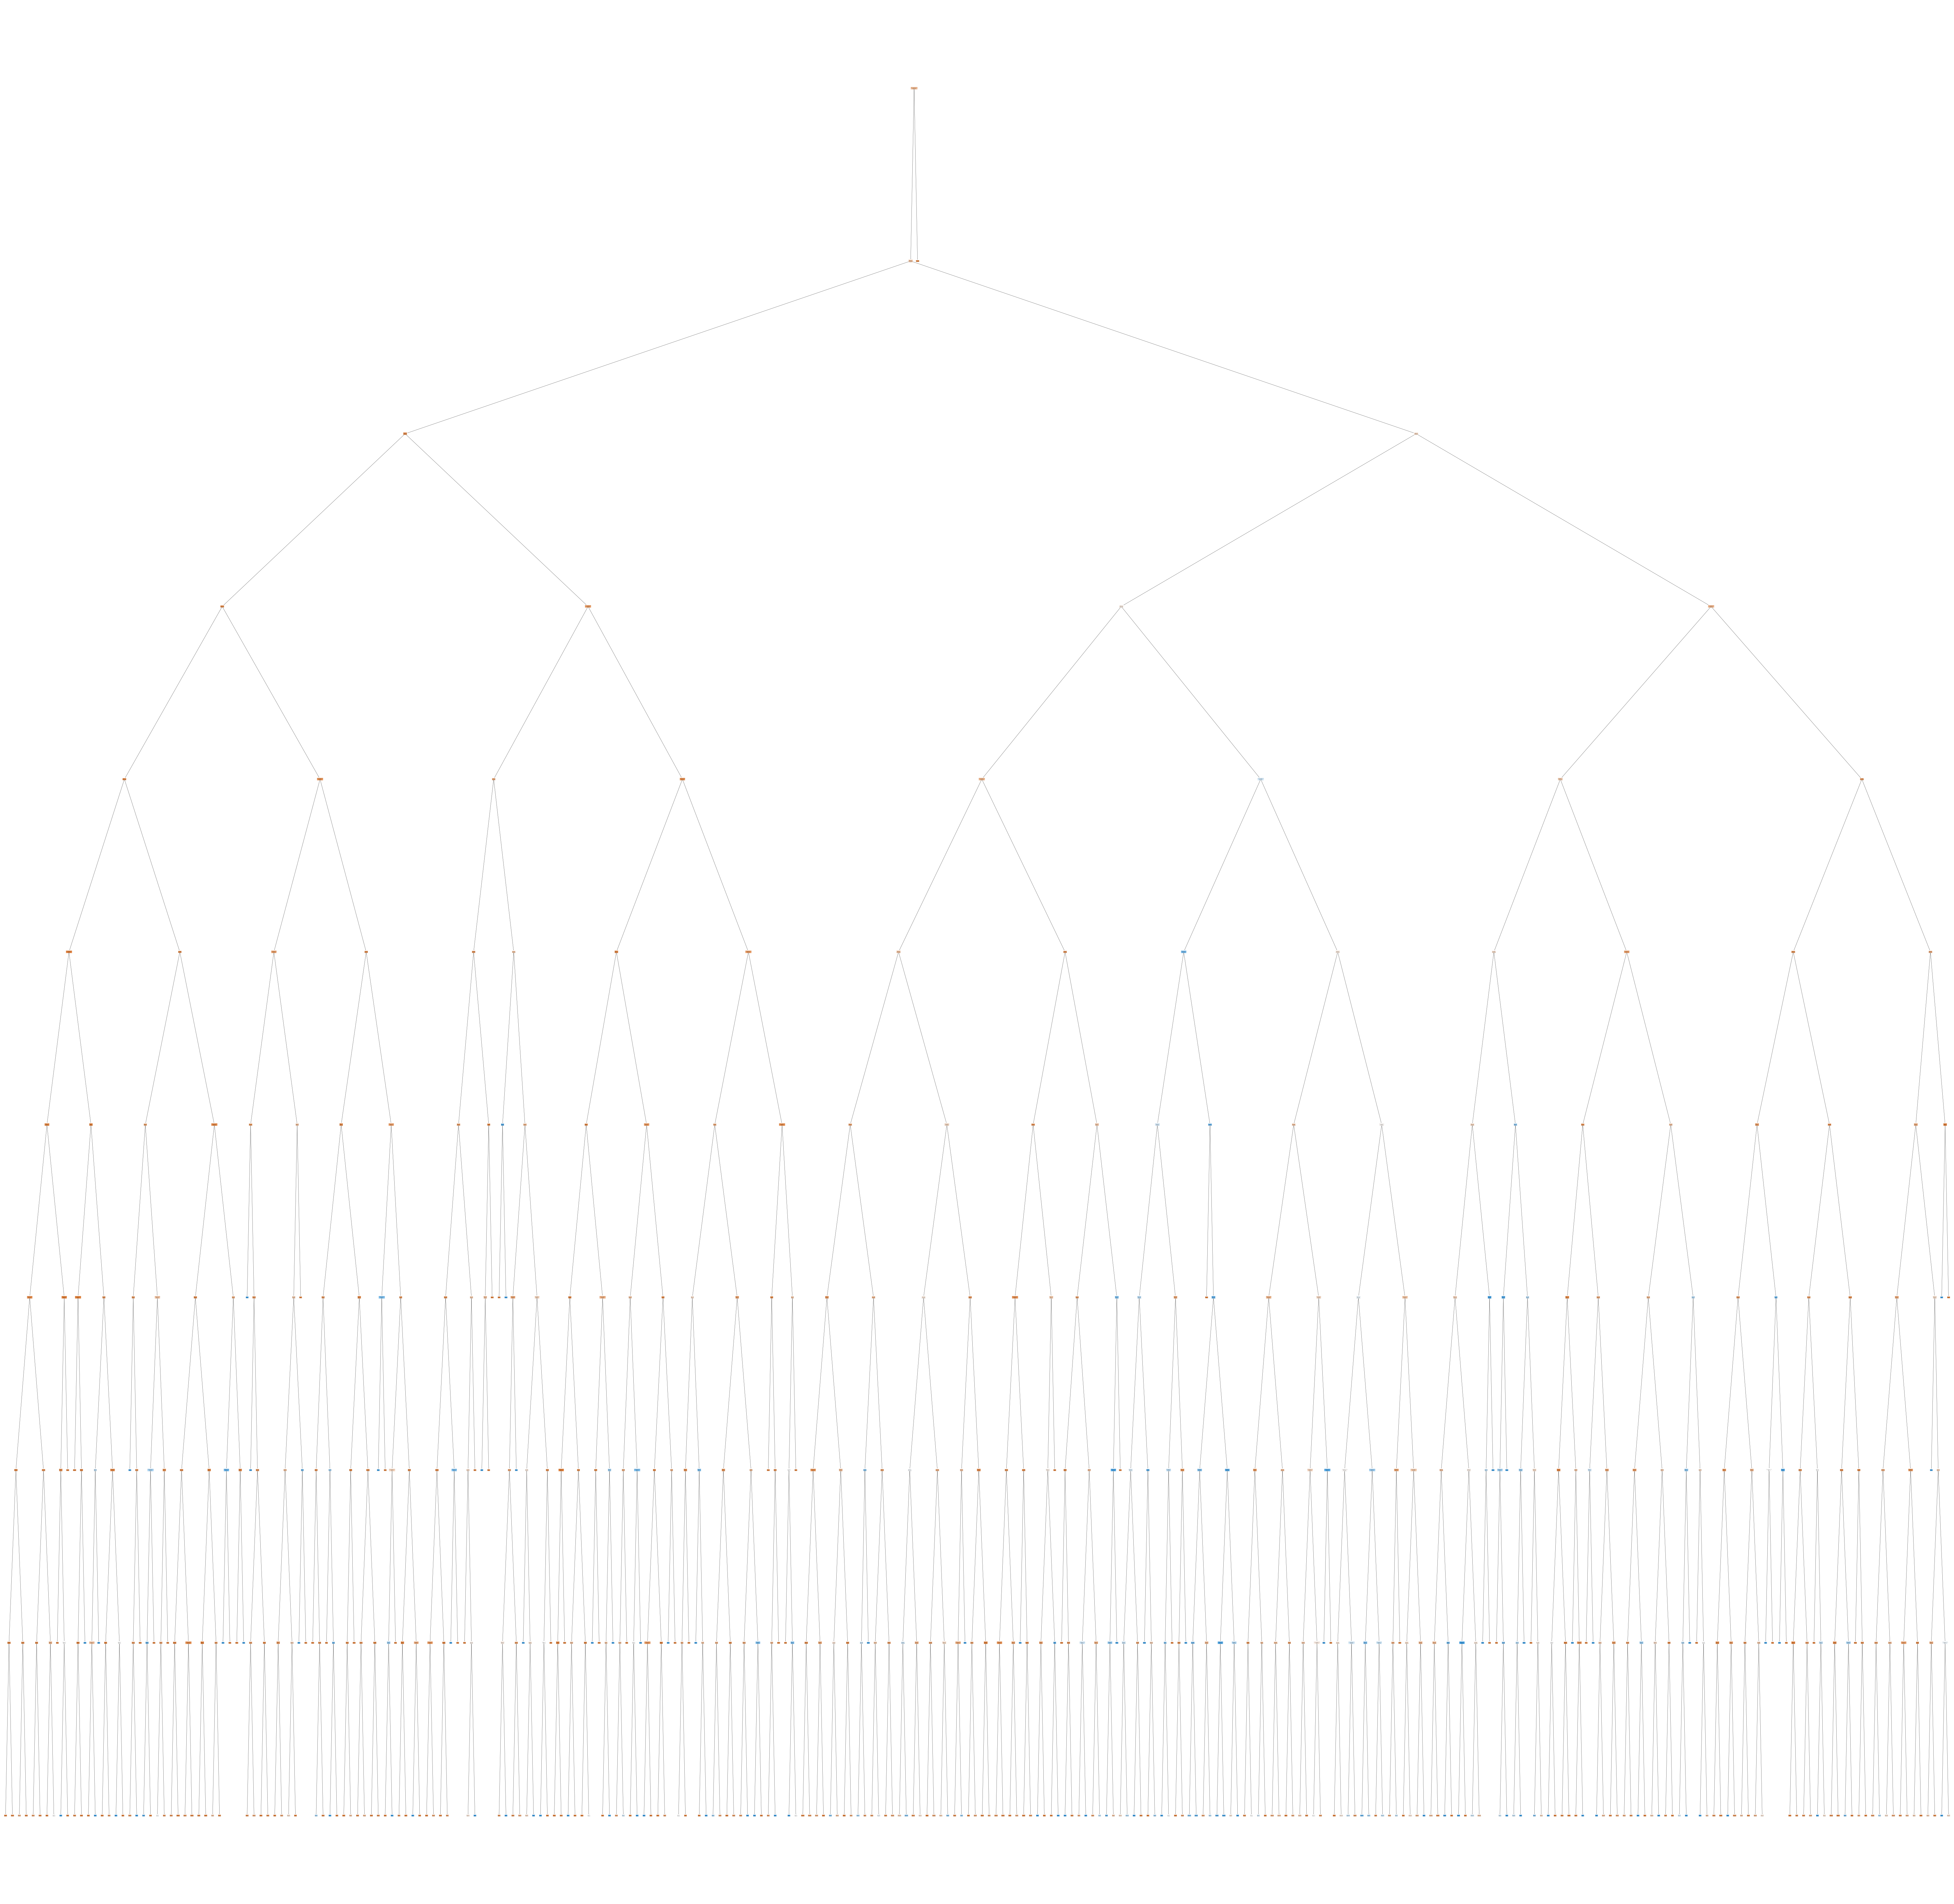

In [13]:
X=df2[['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests']].values
y=df2['is_canceled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(120,120))
tree.plot_tree(
    tree_clf,
    feature_names=['lead_time','arrival_date_year','is_repeated_guest','booking_changes','agent','adr','required_car_parking_spaces','total_of_special_requests'],
    class_names=['0','1'],
    rounded=True,
    filled=True
)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [14]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5978  647]
 [1372 1499]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      6625
           1       0.70      0.52      0.60      2871

    accuracy                           0.79      9496
   macro avg       0.76      0.71      0.73      9496
weighted avg       0.78      0.79      0.78      9496



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


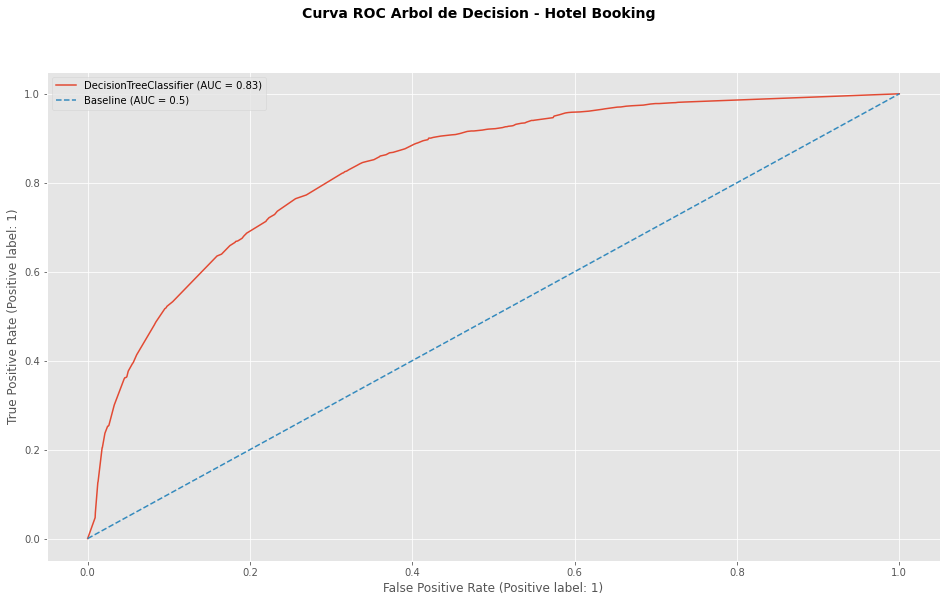

In [18]:
# Visualizar la curva ROC
plot_roc_curve(tree_clf, X_test, y_test)
plt.suptitle("Curva ROC Arbol de Decision - Hotel Booking", fontsize=14, fontweight="bold", )
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Random Forests

In [15]:

from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators=195)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_test)

pred = rndf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

rndf_clf.score(X_test, y_test)

[[6032  593]
 [ 967 1904]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6625
           1       0.76      0.66      0.71      2871

    accuracy                           0.84      9496
   macro avg       0.81      0.79      0.80      9496
weighted avg       0.83      0.84      0.83      9496



0.8357203032855939

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


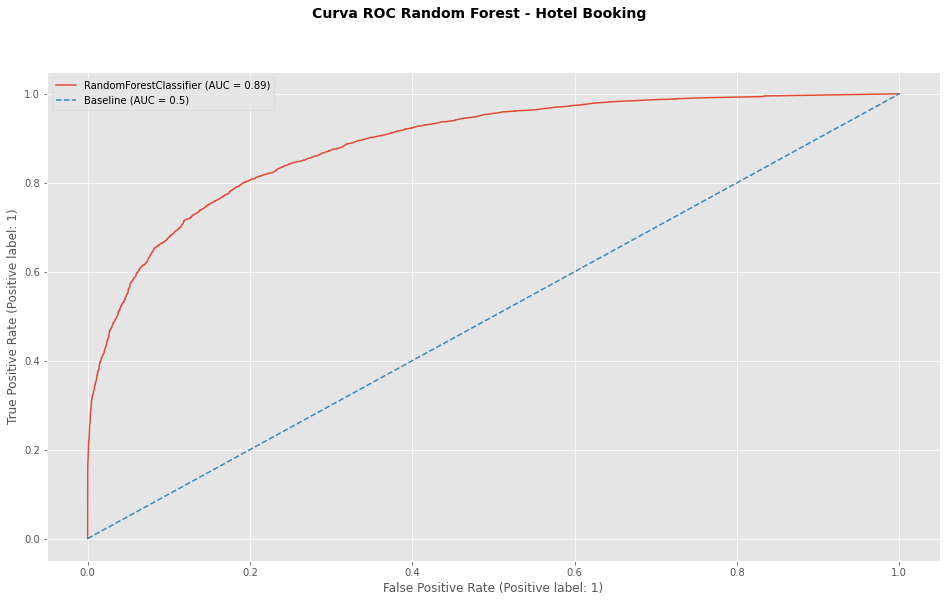

In [19]:
# Visualizar la curva ROC
plot_roc_curve(rndf_clf, X_test, y_test)
plt.suptitle("Curva ROC Random Forest - Hotel Booking", fontsize=14, fontweight="bold", )
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Regresion Logistica

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Entrenamiento regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
y_pred = log_reg.predict(X_test)

pred = log_reg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

log_reg.score(X_test, y_test)

[[6019  606]
 [2037  834]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      6625
           1       0.58      0.29      0.39      2871

    accuracy                           0.72      9496
   macro avg       0.66      0.60      0.60      9496
weighted avg       0.70      0.72      0.69      9496



0.7216722830665543

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


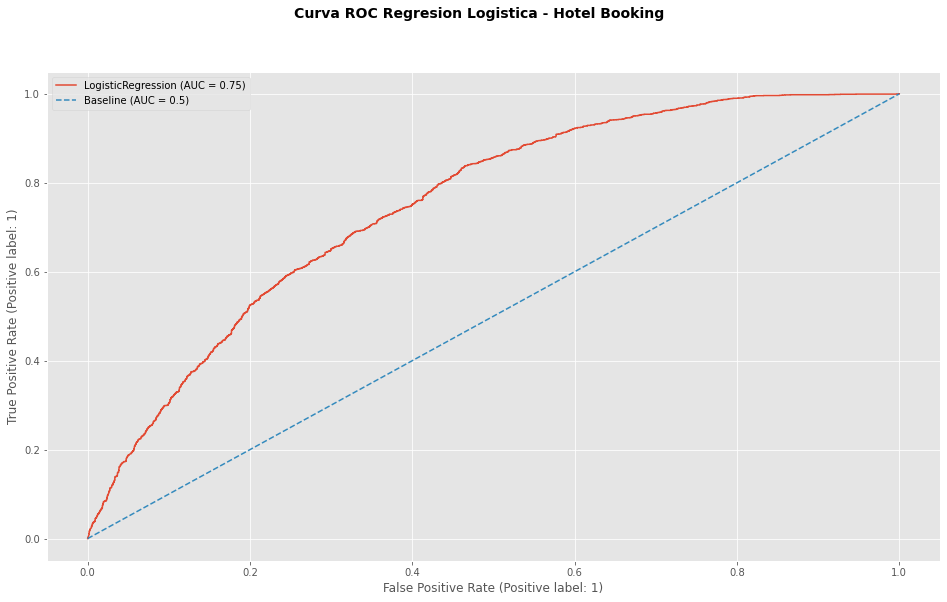

In [21]:
# Visualizar la curva ROC
plot_roc_curve(log_reg, X_test, y_test)
plt.suptitle("Curva ROC Regresion Logistica - Hotel Booking", fontsize=14, fontweight="bold", )
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();